# Extreme benchmarks

This notebook gets the most extreme benchmarks and plots them against each other.

## Compare metrics

In [74]:
from get_all_metrics import get_metrics

metrics_1_400 = list(get_metrics("../results/phase_3_400000ops_1_400"))
metrics_1_3600 = list(get_metrics("../results/phase_3_400000ops_1_3600"))
# metrics_8_400 = list(get_metrics("../results/phase_3_400000ops_8_400"))
# metrics_8_3600 = list(get_metrics("../results/phase_3_400000ops_8_3600"))

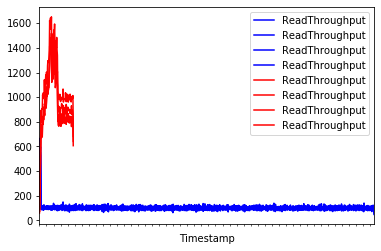

In [97]:
from matplotlib import pyplot as plt
import numpy as np
import math

ax = plt.gca()
ax.xaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_minor_locator(plt.MultipleLocator(20))
metrics_1_400[0].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='blue')
metrics_1_400[1].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='blue')
metrics_1_400[2].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='blue')
metrics_1_400[3].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='blue')

metrics_1_3600[0].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='red')
metrics_1_3600[1].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='red')
metrics_1_3600[2].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='red')
metrics_1_3600[3].plot(kind='line', x='Timestamp', y='ReadThroughput', ax=ax, color='red')
plt.show()


### Example boxplot

   Location Letter     value
0         1      A  0.894207
1         1      A  0.541552
2         1      A  0.378135
3         1      A  0.158422
4         1      A  0.519506


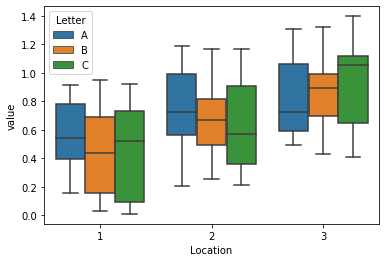

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns

metrics_1_400[0] = metrics_1_400[0].assign(Location=1)
metrics_1_400[1] = metrics_1_400[1].assign(Location=1)

cdf_metrics = pd.concat([metrics_1_400[0], metrics_1_400[1]])
mdf_metrics = pd.melt(cdf_metrics, id_vars=['Location'], var_name=['ReadThroughput'])


data1 = pd.DataFrame(np.random.rand(17,3), columns=['A','B','C']).assign(Location=1)
data2 = pd.DataFrame(np.random.rand(17,3)+0.2, columns=['A','B','C']).assign(Location=2)
data3 = pd.DataFrame(np.random.rand(17,3)+0.4, columns=['A','B','C']).assign(Location=3)

cdf = pd.concat([data1, data2, data3])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['Letter'])
print(mdf.head())

#    Location Letter     value
# 0         1      A  0.223565
# 1         1      A  0.515797
# 2         1      A  0.377588
# 3         1      A  0.687614
# 4         1      A  0.094116

ax = sns.boxplot(x="Location", y="value", hue="Letter", data=mdf)    
plt.show()

## Compare latencies

In [77]:
def get_line_with_find(lines, regex):
    for index, line in enumerate(lines):
        if line.find(regex) != -1:
            return index
    return -1


def get_percentile_latency(percentile, filename):
    file = open(filename, "r")
    lines = map(lambda line: line.rstrip('\n'), file.readlines())
    
    read_lines = list(filter(lambda line: line.find('[READ]') != -1,lines))[4:-1]
    
    specific_line = [line for line in read_lines if line.find("[READ], " + percentile) != -1][0]

    latency = specific_line.split()[-1]
    return latency

In [78]:
get_percentile_latency('95', "../results/phase_3_400000ops_1_400")

'2949'

In [79]:
def get_latency_tuple(load, threshold, filename_prefix = "../results/phase_3_400000ops_"):
    filename = filename_prefix + str(threshold) + "_" + str(load)
    latency = get_percentile_latency('95', filename)
    return (load, int(latency))

def get_latencies_for_threshold(threshold = 1, filename_prefix = "../results/phase_3_400000ops_"):
    return list(map(lambda load: get_latency_tuple(load, threshold, filename_prefix), range(400, 3600, 200)))

def print_latencies_for_threshold(threshold = 1, filename_prefix = "../results/phase_3_400000ops_"):    
    for load in range(400, 3600, 200):
        (load, latency) = get_latency_tuple(load, threshold, filename_prefix)
        print(str(load) + ":" + str(latency))

In [80]:
print_latencies_for_threshold(2)

400:2901
600:2841
800:4035
1000:3775
1200:4763
1400:4339
1600:4407
1800:3463
2000:4359
2200:3997
2400:5179
2600:4707
2800:4567
3000:4439
3200:4863
3400:4555


In [81]:
get_latency_tuple(400, 2)

(400, 2901)

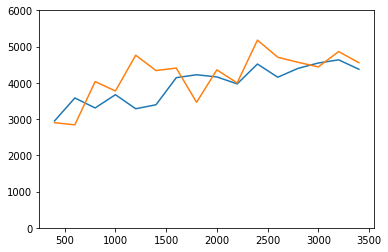

In [100]:
f, ax = plt.subplots(1)

for i in range(1, 3, 1):
    latencies = get_latencies_for_threshold(i)
    latencies_arr = np.asarray(latencies)

    plt.plot(latencies_arr[:,0], latencies_arr[:,1])
    ax.set_ylim(bottom=0, top=6000)

plt.show()